## Part 1: Import Statements

In [1]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# from seaborn import heatmap
# import matplotlib.pyplot as plt

# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.ensemble import RandomForestClassifier


# from imblearn.over_sampling import RandomOverSampler
# from imblearn.pipeline import Pipeline
# from collections import Counter


# from sklearn.naive_bayes import MultinomialNB
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV


# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# Data Processing
import pandas as pd
import numpy as np

# Count Vectorizing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Oversampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
import seaborn as sns
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

## Part 2: Import processed data

In [2]:
data = pd.read_csv("Data/processed_data.csv", index_col=0)
data = data.dropna()
data

,tweet,class
0,woman shouldnt complain cleaning house man alw...,2
1,boy dats coldtyga dwn bad cuffin dat hoe place,1
2,dawg ever fuck bitch stato cry confused shit,1
3,look like tranny,1
4,shit hear might true might faker bitch told ya,1
...,...,...
25291,yous muthafin lie right tl trash mine bible sc...,1
25292,youve gone broke wrong heababy drove redneck c...,2
25294,young buck wan na eat dat nigguh like aint fuc...,1
25295,youu got wild bitches tellin lies,1


## Part 3: Splitting data 

In [3]:
#splitting the data into train, validation, test
X, X_test, y, y_test = train_test_split(data['tweet'], data['class'],  test_size=0.2, random_state=42)

In [4]:
#splitting the data into train and validation
X_train, X_cv, y_train, y_cv = train_test_split(X,y,test_size = 0.25,train_size =0.75, random_state=42)

# X_train,X_test,X_cv  &  Y_train,Y_test,Y_cv will be created

In [5]:
X_train.sample(5)

11117    really hate dont get response back text messag...
10499      dont know whats stressful midterms flappy birds
14705    twitter jail pointless suppose tweet need inst...
1938     yall like want love like rashad new new shit y...
7595     bitch didnt even know fucking real niggas damn...
Name: tweet, dtype: object

## Part 4: Feature Extraction


## Count Vectorization

Word n grams: unigrams

In [6]:
#Count Vectorizing the X_train
count_vec = CountVectorizer()
count_vec.fit(X_train)

X_train_count = count_vec.transform(X_train)
X_train_count = X_train_count.toarray()

#Count Vectorizing the X_cv
X_cv_count = count_vec.transform(X_cv)
X_cv_count = X_cv_count.toarray()

#Count Vectorizing the X_test
X_test_count = count_vec.transform(X_test)
X_test_count = X_test_count.toarray()

count_vec.vocabulary_

{'stop': 13309,
 'spoiling': 12986,
 'fags': 4628,
 'wcw': 15221,
 'babes': 805,
 'love': 8196,
 'thse': 14058,
 'sexy': 12145,
 'bitches': 1302,
 'bestfriend': 1181,
 'babe': 804,
 'yanks': 15762,
 'coming': 2736,
 'disparagement': 3764,
 'pride': 10705,
 'rather': 11121,
 'jack': 7110,
 'fuck': 5249,
 'hoes': 6379,
 'tbh': 13780,
 'shit': 12260,
 'boring': 1545,
 'give': 5558,
 'wife': 15449,
 'lmfao': 8072,
 'little': 8038,
 'like': 7968,
 'message': 8649,
 'hoe': 6363,
 'need': 9246,
 'plan': 10391,
 'stuff': 13400,
 'thats': 13929,
 'saying': 11886,
 'ive': 7100,
 'pinto': 10352,
 'since': 12441,
 'dude': 4065,
 'iphone': 7026,
 'beginning': 1107,
 'gerryshalloweenparty': 5478,
 'halloween': 5985,
 'yesterday': 15833,
 'stupid': 13412,
 'nigger': 9376,
 'youre': 15879,
 'dismissed': 3761,
 'bitch': 1290,
 'wan': 15127,
 'na': 9137,
 'play': 10412,
 'thumper': 14070,
 'tounge': 14276,
 'punching': 10878,
 'smelly': 12671,
 'turtle': 14530,
 'pussy': 10907,
 'lady': 7669,
 'next': 9

Word n grams: bigrams

In [7]:
#Count Vectorizing the X_train
bigram_count_vec = CountVectorizer(ngram_range=(2,2))
bigram_count_vec.fit(X_train)

X_train_count_bigram = bigram_count_vec.transform(X_train)
X_train_count_bigram = X_train_count_bigram.toarray()

#Count Vectorizing the X_cv
X_cv_count = bigram_count_vec.transform(X_cv)
X_cv_count = X_cv_count.toarray()

#Count Vectorizing the X_test
X_test_count_bigram = bigram_count_vec.transform(X_test)
X_test_count_bigram = X_test_count_bigram.toarray()

bigram_count_vec.vocabulary_

{'stop spoiling': 60260,
 'spoiling fags': 59187,
 'wcw babes': 69044,
 'babes love': 3312,
 'love thse': 39463,
 'thse sexy': 63968,
 'sexy bitches': 55945,
 'bitches bestfriend': 7014,
 'bestfriend babe': 4792,
 'yanks coming': 72221,
 'coming disparagement': 12899,
 'disparagement pride': 16695,
 'rather jack': 51946,
 'jack fuck': 33498,
 'fuck hoes': 23032,
 'hoes tbh': 30657,
 'tbh shit': 62096,
 'shit boring': 56296,
 'boring give': 8308,
 'give wife': 25626,
 'wife lmfao': 70067,
 'lmfao little': 38311,
 'little like': 37968,
 'message hoe': 41385,
 'hoe need': 29981,
 'need plan': 43924,
 'plan stuff': 49151,
 'thats like': 62932,
 'like saying': 37397,
 'saying ive': 54754,
 'ive pinto': 33457,
 'pinto since': 49026,
 'since dude': 57287,
 'dude ive': 17919,
 'ive iphone': 33445,
 'iphone since': 33239,
 'since beginning': 57278,
 'gerryshalloweenparty halloween': 24357,
 'halloween yesterday': 28095,
 'yesterday stupid': 72704,
 'stupid nigger': 60660,
 'youre dismissed': 73

## Part 5: Oversampling

In [8]:
def oversample(X_train_vectorized, y_train):
    print("Before Oversampling: {}".format(Counter(y_train)))

    # # define oversampling strategy
    oversample = RandomOverSampler(sampling_strategy='all')

    # # fit and apply the transform
    X_train_over, y_train_over = oversample.fit_resample(X_train_vectorized, y_train)
    print("After Oversampling: {}".format(Counter(y_train_over)))
    
    return X_train_over, y_train_over

Oversampling CountVectorized training data for unigram

In [9]:
X_train_over_count, y_train_over_count = oversample(X_train_count, y_train)

Before Oversampling: Counter({1: 11062, 2: 2437, 0: 820})
After Oversampling: Counter({1: 11062, 2: 11062, 0: 11062})


Oversampling CountVectorized training data for bigram

In [10]:
X_train_over_count_bigram, y_train_over_count_bigram = oversample(X_train_count_bigram, y_train)

Before Oversampling: Counter({1: 11062, 2: 2437, 0: 820})
After Oversampling: Counter({1: 11062, 2: 11062, 0: 11062})


## Part 6: Training model and evaluation

In [11]:
def printModelStats(y_preds, y_test):
    print(classification_report(y_test, y_preds, target_names = ['Hate', 'Offensive', 'Neither']))
    
    cm = confusion_matrix(y_test,y_preds)
    print("The confusion matrix:")
    print(cm)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
    sns.heatmap((cm_percent), annot = True, cmap = "Blues").set(title ="Confusion Matrix Expressed in %")

In [12]:
# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train_over_count, y_train_over_count)

RandomForestClassifier()

In [13]:
y_pred = rf.predict(X_test_count)



              precision    recall  f1-score   support

        Hate       0.42      0.32      0.37       280
   Offensive       0.93      0.94      0.93      3715
     Neither       0.83      0.86      0.84       778

    accuracy                           0.89      4773
   macro avg       0.73      0.71      0.71      4773
weighted avg       0.88      0.89      0.89      4773

The confusion matrix:
[[  90  174   16]
 [ 103 3489  123]
 [  20   91  667]]


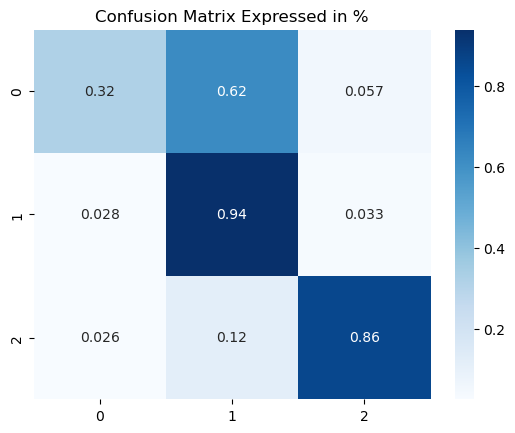

In [14]:
printModelStats(y_pred, y_test)

In [15]:
report = classification_report(y_test, y_pred, target_names=['Hate', 'Offensive', 'Neither'])

# Split the classification report into lines and find the line containing 'Hate'
lines = report.split('\n')
hate_metrics = [float(num) for num in lines[2].split()[1:4]]

precision_hate, recall_hate, f1_score_hate = hate_metrics

print(f'Precision (Hate): {precision_hate}')
print(f'Recall (Hate): {recall_hate}')
print(f'F1 Score (Hate): {f1_score_hate}')

Precision (Hate): 0.42
Recall (Hate): 0.32
F1 Score (Hate): 0.37


In [16]:
# Initialize and train the Random Forest Classifier
# rff = RandomForestClassifier()
rf.fit(X_train_over_count_bigram, y_train_over_count_bigram)


RandomForestClassifier()

In [18]:
y_pred = rf.predict(X_test_count_bigram)


              precision    recall  f1-score   support

        Hate       0.35      0.16      0.22       280
   Offensive       0.92      0.62      0.74      3715
     Neither       0.31      0.86      0.46       778

    accuracy                           0.63      4773
   macro avg       0.53      0.55      0.47      4773
weighted avg       0.79      0.63      0.67      4773

The confusion matrix:
[[  44  104  132]
 [  72 2315 1328]
 [  11   97  670]]


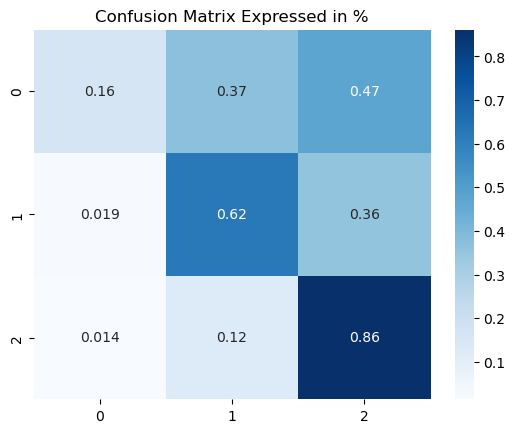

In [19]:
printModelStats(y_pred, y_test)

In [20]:
report = classification_report(y_test, y_pred, target_names=['Hate', 'Offensive', 'Neither'])

# Split the classification report into lines and find the line containing 'Hate'
lines = report.split('\n')
hate_metrics = [float(num) for num in lines[2].split()[1:4]]

precision_hate, recall_hate, f1_score_hate = hate_metrics

print(f'Precision (Hate): {precision_hate}')
print(f'Recall (Hate): {recall_hate}')
print(f'F1 Score (Hate): {f1_score_hate}')

Precision (Hate): 0.35
Recall (Hate): 0.16
F1 Score (Hate): 0.22


In [ ]:
# param_dist = {'n_estimators': randint(50,500),
#               'max_depth': randint(1,20)}

# # Create a random forest classifier
# rf = RandomForestClassifier()

# # Use random search to find the best hyperparameters
# rand_search = RandomizedSearchCV(rf, 
#                                  param_distributions = param_dist, 
#                                  n_iter=5, 
#                                  cv=5)

# # Fit the random search object to the data
# rand_search.fit(X_train_over_count, y_train_over_count)

KeyboardInterrupt: 

In [ ]:
# best_rf = rand_search.best_estimator_

# # Print the best hyperparameters
# print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 17, 'n_estimators': 138}
